# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 31

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.716081,3.8,4.488074,NaN,4.366208,2.070194
560,Kelleher,Liverpool,45,2.000000,10,8.448733,5.0,4.224366,NaN,4.346794,1.991385
12,Martínez,Aston Villa,54,29.814815,161,136.209174,5.4,4.568506,3.747843,4.659124,1.965972
213,Meslier,Leeds United,47,29.772727,131,117.987693,4.4,3.962945,5.850600,3.895738,1.827970
597,Sánchez,Brighton,45,19.750000,79,76.345091,4.0,3.865574,3.915842,3.902101,1.822249
96,Pope,Burnley,55,28.888889,130,121.487834,4.5,4.205348,2.802299,4.191641,1.793166
417,Johnstone,West Brom,45,29.743590,116,112.745103,3.9,3.790568,6.657860,3.674990,1.786891
245,Adrián,Liverpool,42,2.972973,11,10.640008,3.7,3.578912,NaN,3.701339,1.746330
326,Dubravka,Newcastle Utd,48,6.000000,21,22.899267,3.5,3.816544,4.012284,3.579459,1.742006


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.706572,7.0,5.176643,NaN,5.257457,2.467868
273,Stones,Manchester City,52,18.923077,123,95.920882,6.5,5.068990,6.015778,5.118965,2.222899
277,Cancelo,Manchester City,60,24.117647,123,127.575605,5.1,5.289720,5.515275,5.319488,2.159519
75,Bernardo,Brighton,39,2.941176,5,11.770081,1.7,4.001827,NaN,4.018736,2.026404
123,James,Chelsea,50,25.277778,91,109.639135,3.6,4.337372,3.208729,4.115728,1.939732
109,Rüdiger,Chelsea,47,14.042553,66,57.192101,4.7,4.072771,5.450523,3.914318,1.878629
283,Zinchenko,Manchester City,55,14.871795,58,65.337550,3.9,4.393387,3.761354,4.458362,1.873346
104,Alonso,Chelsea,57,10.000000,42,44.724519,4.2,4.472452,6.315901,4.196453,1.873304
13,Chambers,Arsenal,45,4.000000,14,15.867773,3.5,3.966943,NaN,4.195657,1.870035


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
301,Lingard,West Ham,65,9.010989,82,52.975849,9.1,5.879027,6.642006,5.680671,2.305944
271,Gündogan,Manchester City,59,23.833333,143,127.524362,6.0,5.350673,3.910066,5.219634,2.202837
105,Jorginho,Chelsea,47,21.818182,96,90.861298,4.4,4.164476,4.232845,3.905950,1.920930
24,Saka,Arsenal,51,26.052632,99,110.688093,3.8,4.248634,3.318119,4.342727,1.881327
302,Fernandes,Manchester Utd,116,30.857143,216,196.445521,7.0,6.366290,5.319109,6.496780,1.869207
570,Raphinha,Leeds United,56,26.136364,115,115.452304,4.4,4.417306,5.094117,4.267338,1.866652
37,Grealish,Aston Villa,75,21.864407,129,111.637109,5.9,5.105883,NaN,5.116106,1.864405
272,De Bruyne,Manchester City,120,24.150943,128,153.076572,5.3,6.338327,6.433506,6.144239,1.829717
203,Harrison,Leeds United,54,28.837209,124,117.356387,4.3,4.069617,5.686399,3.941746,1.751284


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,66,31.153846,162,152.124478,5.2,4.883008,4.243423,4.723811,1.900708
506,Wilson,Newcastle Utd,65,22.075472,117,104.742687,5.3,4.744754,1.000000,4.468660,1.861046
388,Kane,Tottenham,117,29.014085,206,184.515821,7.1,6.359526,7.343981,6.651542,1.859224
437,Antonio,West Ham,66,20.930233,90,95.052239,4.3,4.541385,3.828333,4.334354,1.767732
224,Vardy,Leicester City,101,26.964286,151,150.665373,5.6,5.587590,6.023867,5.892801,1.758182
514,Watkins,Aston Villa,65,30.000000,135,134.202687,4.5,4.473423,3.999698,4.461325,1.754621
164,Calvert-Lewin,Everton,75,26.037736,138,124.462687,5.3,4.780089,4.866667,4.833094,1.745442
91,Wood,Burnley,63,25.789474,98,108.640896,3.8,4.212606,7.629446,4.167879,1.678342
68,Maupay,Brighton,60,28.857143,101,117.300896,3.5,4.064883,3.941991,4.020993,1.659481


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,116,30.857143,216,196.445521,7.0,6.366290,6.496780,1.869207
388,Kane,Tottenham,117,29.014085,206,184.515821,7.1,6.359526,6.651542,1.859224
272,De Bruyne,Manchester City,120,24.150943,128,153.076572,5.3,6.338327,6.144239,1.829717
254,Salah,Liverpool,125,30.000000,189,178.444538,6.3,5.948151,6.244786,1.682391
301,Lingard,West Ham,65,9.010989,82,52.975849,9.1,5.879027,5.680671,2.305944
224,Vardy,Leicester City,101,26.964286,151,150.665373,5.6,5.587590,5.892801,1.758182
271,Gündogan,Manchester City,59,23.833333,143,127.524362,6.0,5.350673,5.219634,2.202837
390,Son,Tottenham,94,30.161290,187,160.161738,6.2,5.310175,5.586872,1.731988
277,Cancelo,Manchester City,60,24.117647,123,127.575605,5.1,5.289720,5.319488,2.159519


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.176643,NaN,4.130661,5.257457,2.467868
301,Lingard,West Ham,65,9.010989,9.1,5.879027,6.642006,5.928569,5.680671,2.305944
273,Stones,Manchester City,52,18.923077,6.5,5.068990,6.015778,4.837429,5.118965,2.222899
271,Gündogan,Manchester City,59,23.833333,6.0,5.350673,3.910066,5.199743,5.219634,2.202837
277,Cancelo,Manchester City,60,24.117647,5.1,5.289720,5.515275,5.045061,5.319488,2.159519
112,Arrizabalaga,Chelsea,47,3.947368,3.8,4.488074,NaN,4.528544,4.366208,2.070194
75,Bernardo,Brighton,39,2.941176,1.7,4.001827,NaN,3.260659,4.018736,2.026404
560,Kelleher,Liverpool,45,2.000000,5.0,4.224366,NaN,3.958034,4.346794,1.991385
12,Martínez,Aston Villa,54,29.814815,5.4,4.568506,3.747843,4.149843,4.659124,1.965972


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
239,Justin,Leicester City,48,22.954545,101,90.145887,4.4,3.927148,8.796761,4.336380,1.792489
112,Arrizabalaga,Chelsea,47,3.947368,15,17.716081,3.8,4.488074,6.986341,4.366208,2.070194
302,Fernandes,Manchester Utd,116,30.857143,216,196.445521,7.0,6.366290,6.292896,6.496780,1.869207
388,Kane,Tottenham,117,29.014085,206,184.515821,7.1,6.359526,6.261991,6.651542,1.859224
91,Wood,Burnley,63,25.789474,98,108.640896,3.8,4.212606,5.786297,4.167879,1.678342
233,Iheanacho,Leicester City,60,17.948718,70,62.820000,3.9,3.499971,5.737500,3.653885,1.428857
245,Adrián,Liverpool,42,2.972973,11,10.640008,3.7,3.578912,5.730734,3.701339,1.746330
120,Mount,Chelsea,72,30.000000,129,132.843240,4.3,4.428108,5.501705,4.162965,1.650258
570,Raphinha,Leeds United,56,26.136364,115,115.452304,4.4,4.417306,5.418386,4.267338,1.866652


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,116,30.857143,216,196.445521,7.0,6.366290,7.089455,1.869207
224,Vardy,Leicester City,101,26.964286,151,150.665373,5.6,5.587590,6.621494,1.758182
388,Kane,Tottenham,117,29.014085,206,184.515821,7.1,6.359526,6.470152,1.859224
254,Salah,Liverpool,125,30.000000,189,178.444538,6.3,5.948151,6.379940,1.682391
272,De Bruyne,Manchester City,120,24.150943,128,153.076572,5.3,6.338327,6.146528,1.829717
301,Lingard,West Ham,65,9.010989,82,52.975849,9.1,5.879027,5.928569,2.305944
251,Mané,Liverpool,118,28.222222,127,145.932614,4.5,5.170841,5.524523,1.505290
390,Son,Tottenham,94,30.161290,187,160.161738,6.2,5.310175,5.443458,1.731988
271,Gündogan,Manchester City,59,23.833333,143,127.524362,6.0,5.350673,5.199743,2.202837


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,117,29.014085,7.1,6.359526,6.470152,1.859224,16.5,6.3,22.8,0.785825
254,Salah,Liverpool,125,30.000000,6.3,5.948151,6.379940,1.682391,16.4,4.3,20.7,0.690000
224,Vardy,Leicester City,101,26.964286,5.6,5.587590,6.621494,1.758182,16.1,4.3,20.4,0.756556
202,Bamford,Leeds United,66,31.153846,5.2,4.883008,4.793413,1.900708,14.5,3.5,18.0,0.577778
164,Calvert-Lewin,Everton,75,26.037736,5.3,4.780089,4.781738,1.745442,13.0,1.2,14.2,0.545362
514,Watkins,Aston Villa,65,30.000000,4.5,4.473423,3.699286,1.754621,13.0,3.1,16.1,0.536667
302,Fernandes,Manchester Utd,116,30.857143,7.0,6.366290,7.089455,1.869207,13.0,10.2,23.2,0.751852
251,Mané,Liverpool,118,28.222222,4.5,5.170841,5.524523,1.505290,12.2,4.0,16.2,0.574016
68,Maupay,Brighton,60,28.857143,3.5,4.064883,3.333444,1.659481,11.1,3.4,14.5,0.502475


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,...,xG_week22,xG_week23,xG_week24,xG_week25,xG_week26,xG_week27,xG_week28,xG_week29,xG_week3,xG_week30,xG_week31,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
620,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
435,129.343035,4.184628,10,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,20,634,75.0,100.0,37.238557,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,2.204777,2.297094,2.141341,4.239672,3.331484,2.441341,3.174192,4.426123,10.087068,NaN,8.071518,1.807586,6.780022,2.539465,4.297316,7.590127,9.194725,3.331484,3.726123,7.440687,3.204777,1.030734,6.186341,1.62834,0.0,12.264926,5.095811,3.331484,1.661196,5.430734,5.495247,3


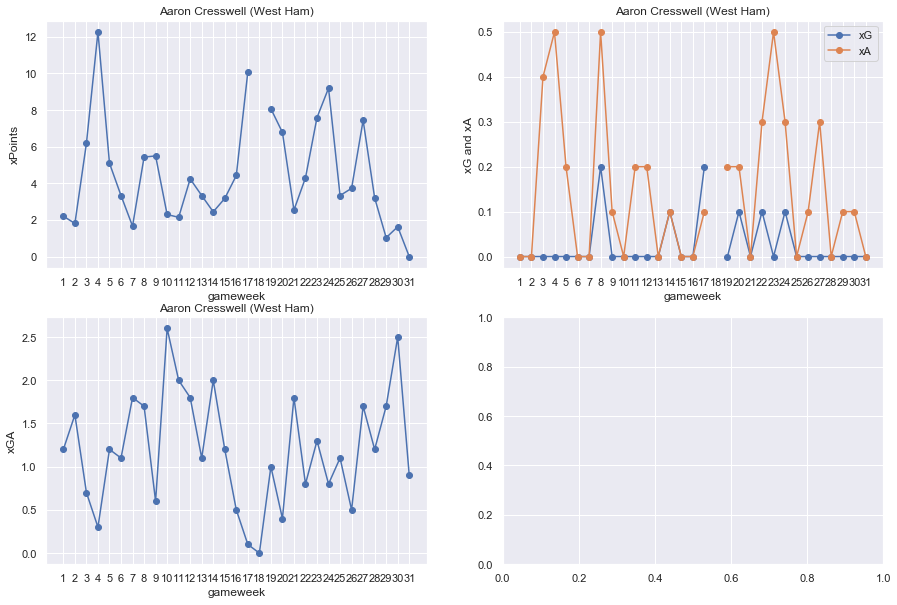

In [14]:
# find player index
name_string = 'Cress'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 435

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('Ihean'),'web_name']

id
233    Iheanacho
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,435,277,390,302,272,301,388,202,233] #vardy=224, grealish=37, mane=251
my_subs = [597,558,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 63.11823957878734
Expected points next gameweek: 64.76130504201384


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,29.814815,5.4,4.568506,3.747843,4.600358,4.149843,4.659124,1.965972
109,Rüdiger,Chelsea,47,14.042553,4.7,4.072771,5.450523,4.515800,4.066755,3.914318,1.878629
435,Cresswell,West Ham,59,30.909091,4.4,4.184628,2.660908,4.144431,4.517261,4.209056,1.722784
277,Cancelo,Manchester City,60,24.117647,5.1,5.289720,5.515275,4.131439,5.045061,5.319488,2.159519
390,Son,Tottenham,94,30.161290,6.2,5.310175,3.816005,4.591299,5.443458,5.586872,1.731988
302,Fernandes,Manchester Utd,116,30.857143,7.0,6.366290,5.319109,6.292896,7.089455,6.496780,1.869207
272,De Bruyne,Manchester City,120,24.150943,5.3,6.338327,6.433506,4.940441,6.146528,6.144239,1.829717
301,Lingard,West Ham,65,9.010989,9.1,5.879027,6.642006,NaN,5.928569,5.680671,2.305944
388,Kane,Tottenham,117,29.014085,7.1,6.359526,7.343981,6.261991,6.470152,6.651542,1.859224



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,19.750000,4.0,3.865574,3.915842,4.400937,3.451352,3.902101,1.822249
558,Coufal,West Ham,46,26.756757,3.7,3.868130,3.107729,3.808101,4.199663,3.885866,1.803525
23,Smith Rowe,Arsenal,42,13.939394,3.3,3.256733,2.348293,2.565991,3.405021,3.330270,1.589123
74,White,Brighton,45,30.000000,3.0,3.322494,4.155842,4.180937,2.840158,3.354934,1.566239


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)